## 1. Absolute Difference

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [2]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [3]:
query = read_image_from_path(query_path, size)

In [4]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

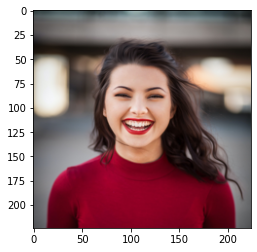

In [5]:
plt.imshow(query/255.0);

In [6]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [7]:
ls_path_score = []

In [8]:
%%time
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = absolute_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min 56s

Wall time: 996 ms


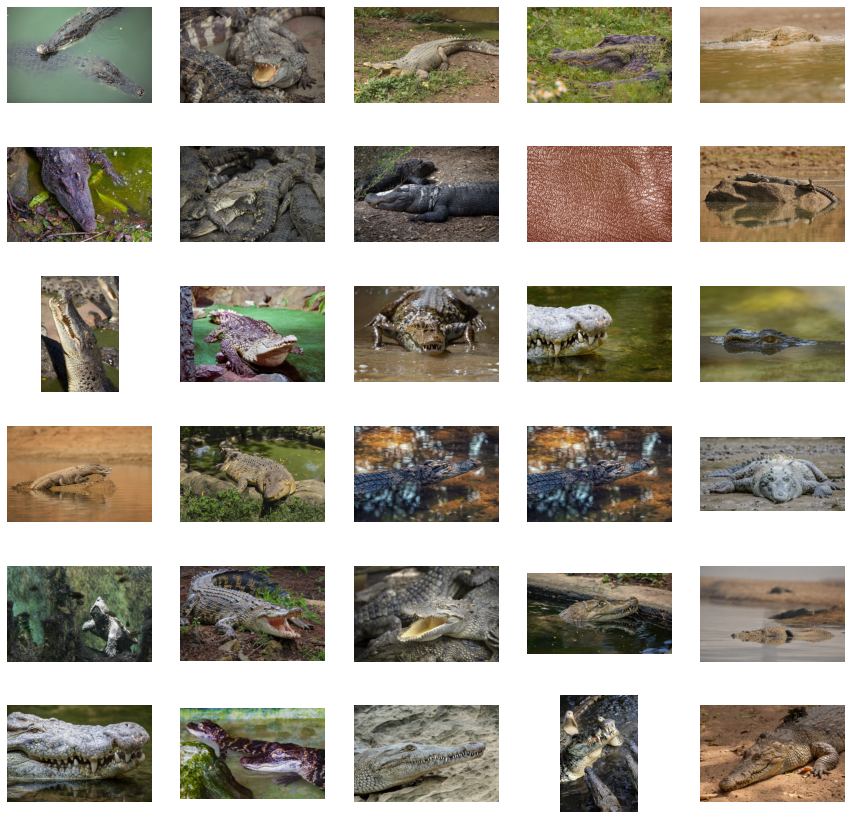

In [9]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 2. Mean Square Difference

In [10]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [11]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [12]:
query = read_image_from_path(query_path, size)

In [13]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

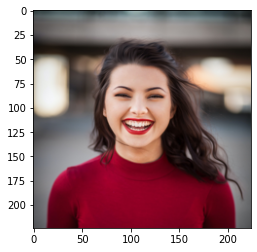

In [14]:
plt.imshow(query/255.0);

In [15]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [16]:
ls_path_score = []

In [17]:
%%time
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = mean_square_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 4min 1s

Wall time: 4min 1s


In [18]:
len(ls_path_score)

17044

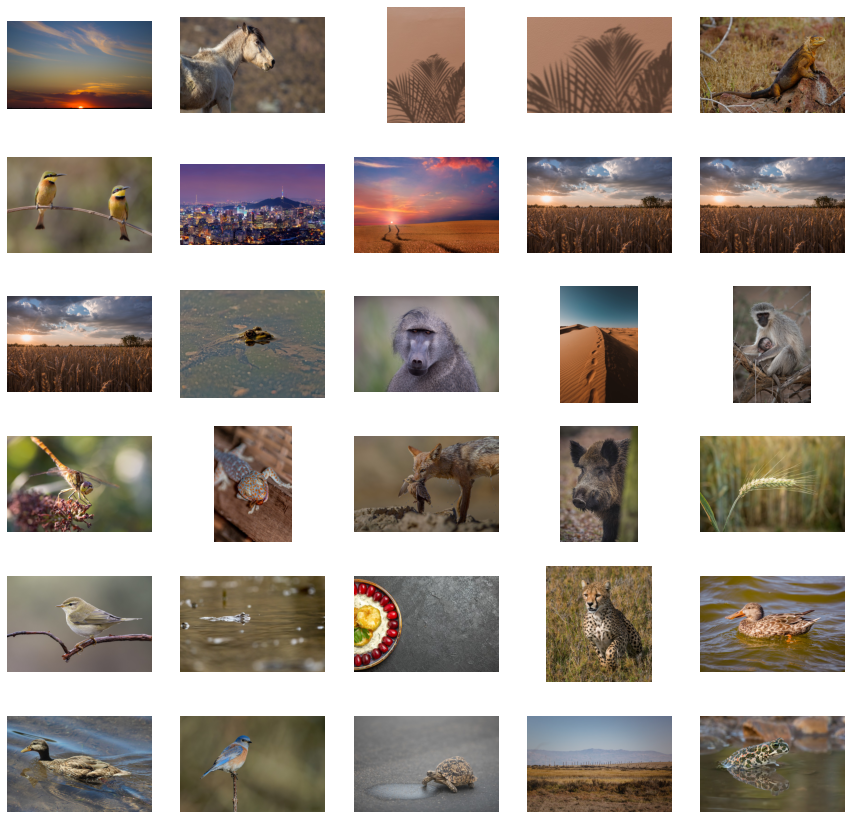

In [19]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 3. Cosine Similarity

In [20]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [21]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [22]:
query = read_image_from_path(query_path, size)

In [23]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

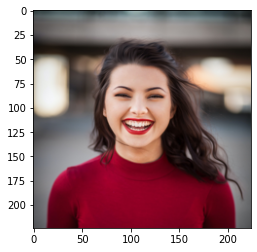

In [24]:
plt.imshow(query/255.0);

In [30]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [31]:
ls_path_score = []

In [32]:
%%time
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = cosine_similarity(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min 24s

Wall time: 3min 8s


In [33]:
len(ls_path_score)

17044

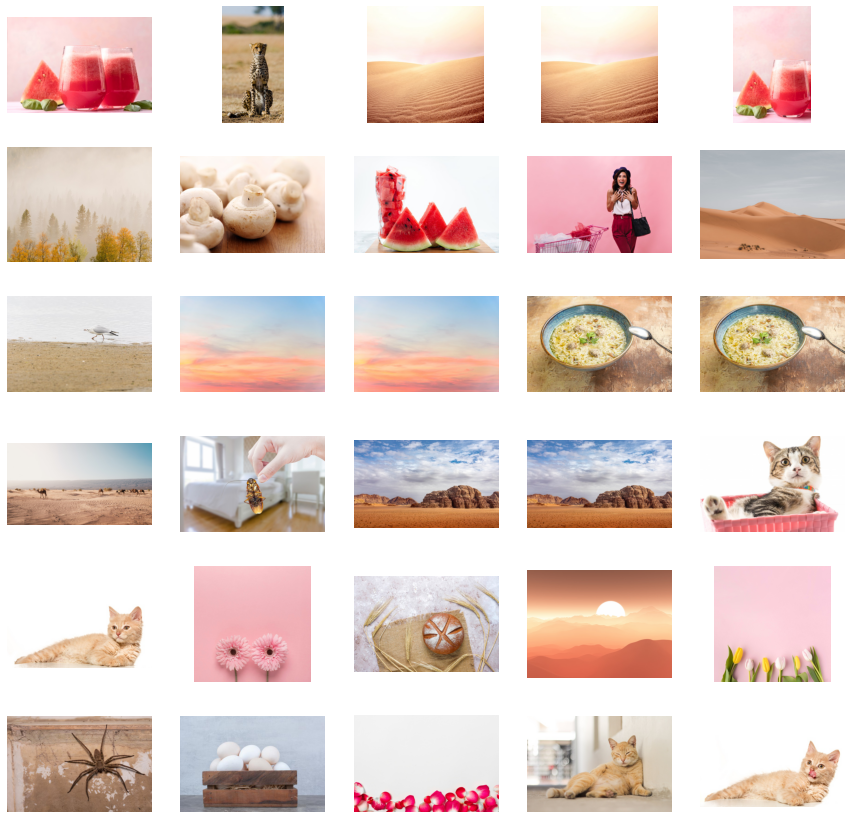

In [34]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 4. Correlation Coefficient

In [35]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [36]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [37]:
query = read_image_from_path(query_path, size)

In [38]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

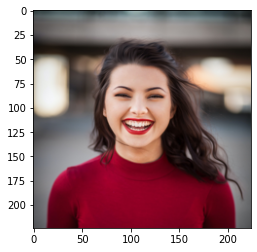

In [39]:
plt.imshow(query/255.0);

![](https://cdn.educba.com/academy/wp-content/uploads/2019/06/Correlation-Coefficient-Formula.jpg)

In [48]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [49]:
ls_path_score = []

In [50]:
%%time
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = correlation_coefficient(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min 4s

Wall time: 3min 30s


In [51]:
len(ls_path_score)

17044

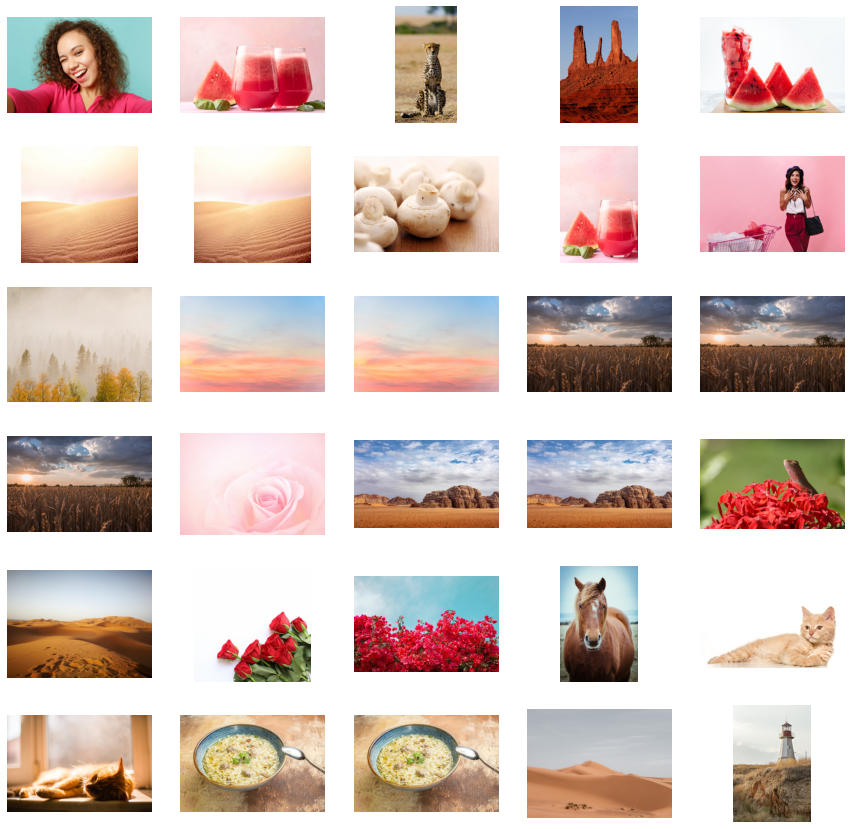

In [52]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 5. Feature Extractor with Convolution Neural Network

Chạy file offline_feature_extractor.py để Extractor Feature folders images từ folder img.

Sau khi chạy xong sẽ nhận được 1 file tại "feature/all_feartures.npz" 

In [53]:
# !python offline_feature_extractor.py

## 6. CNN + Absolute Diffence

In [1]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [2]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [3]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [4]:
fe = FeatureExtractor()

In [5]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [6]:
query = read_image_from_path(query_path, size)

In [7]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

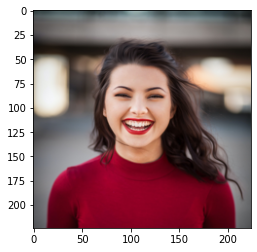

In [8]:
plt.imshow(query/255.0);

In [9]:
%%time
query_vector = fe.extract(query[None, :])
rates = absolute_difference(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#3.21 s

Wall time: 2.95 s


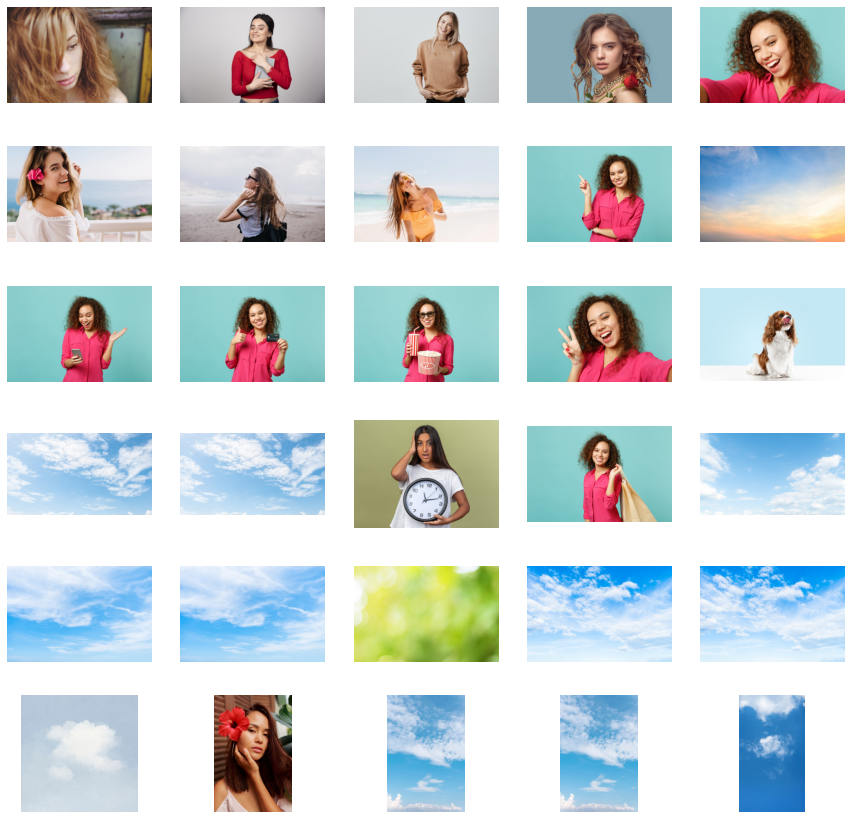

In [10]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 7. CNN + Mean Square Difference

In [11]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [12]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [13]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [14]:
fe = FeatureExtractor()

In [15]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [16]:
query = read_image_from_path(query_path, size)

In [17]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

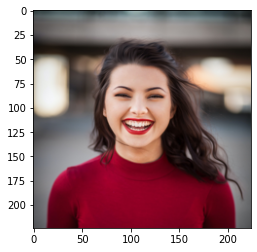

In [18]:
plt.imshow(query/255.0);

In [19]:
%%time
query_vector = fe.extract(query[None, :])
rates = mean_square_difference(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#1.29 s

Wall time: 1.12 s


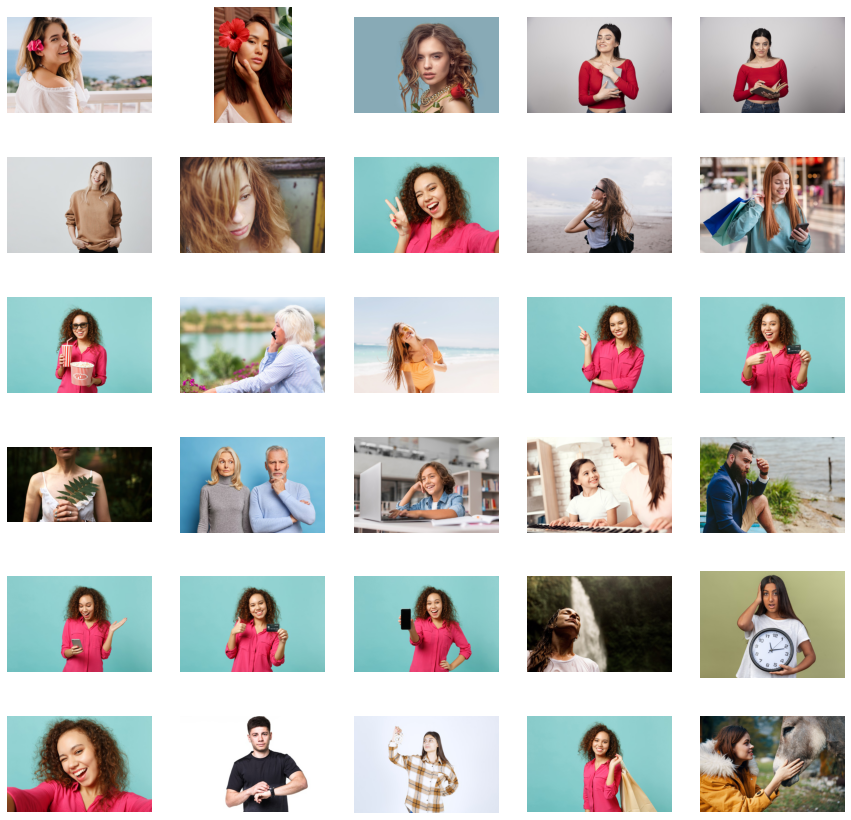

In [20]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 8. CNN + Cosine Similarity

In [54]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [55]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [56]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [57]:
fe = FeatureExtractor()

In [58]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [59]:
query = read_image_from_path(query_path, size)

In [60]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

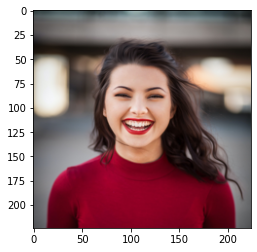

In [61]:
plt.imshow(query/255.0);

In [62]:
query_vector = fe.extract(query[None, :])

In [63]:
%%time
query_vector = fe.extract(query[None, :])
rates = cosine_similarity(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#273 ms

Wall time: 294 ms


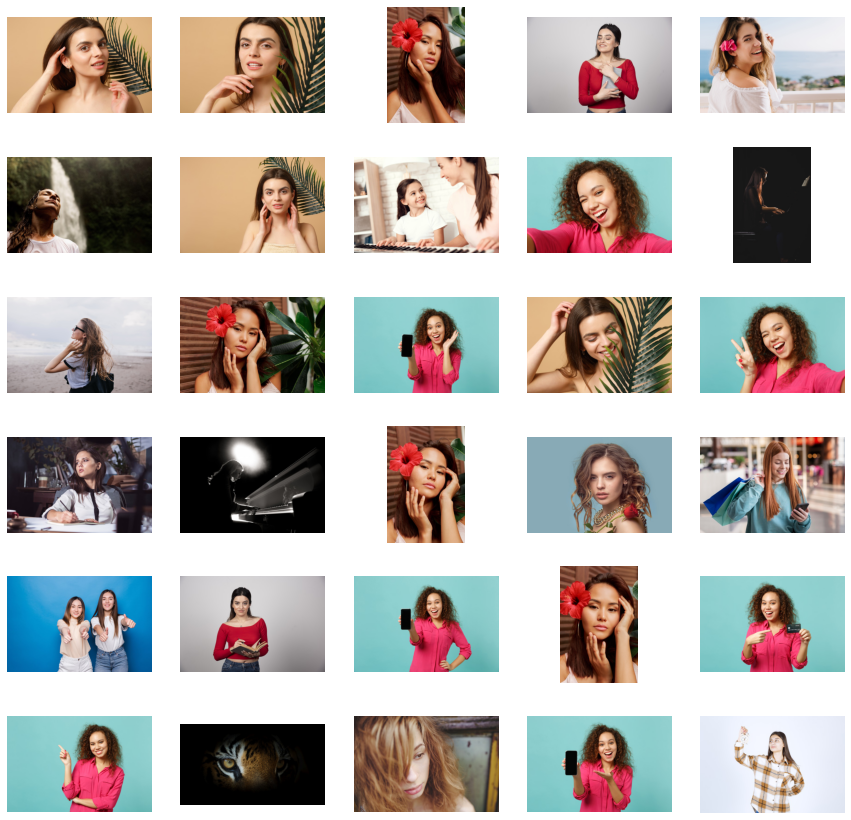

In [64]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 9. CNN + Correlation Coefficient

In [65]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [66]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [67]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [68]:
fe = FeatureExtractor()

In [69]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [70]:
query = read_image_from_path(query_path, size)

In [71]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

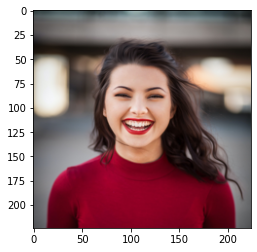

In [72]:
plt.imshow(query/255.0);

In [73]:
%%time
query_vector = fe.extract(query[None, :])
rates = correlation_coefficient(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#273 ms

Wall time: 1.36 s


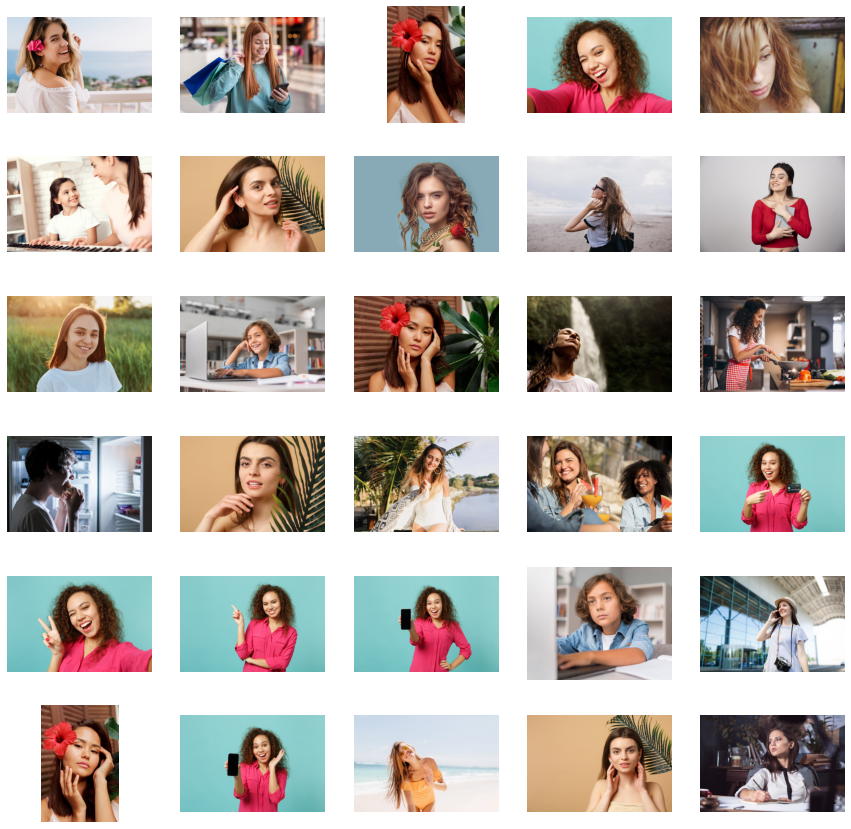

In [74]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()